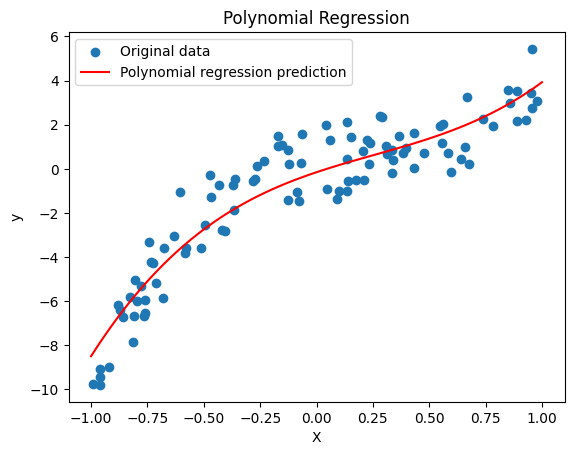

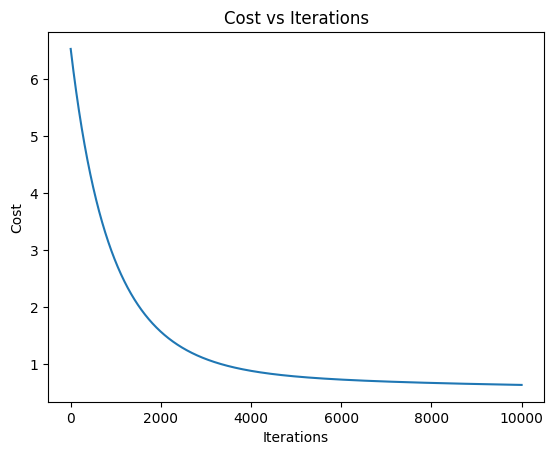

In [7]:
import numpy as np

class PolynomialRegression:
    def __init__(self, degree=3, learning_rate=0.01, max_iter=1000, tolerance=1e-6):
        self.degree = degree
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.theta = None
        self.cost_history = []  # Store the cost function value at each iteration

    def _polynomial_features(self, X):
        n_samples = X.shape[0]
        X_poly = np.ones((n_samples, 1))  # Include bias term

        for degree in range(1, self.degree + 1):
            X_poly = np.concatenate((X_poly, X ** degree), axis=1)

        return X_poly

    def _compute_cost(self, X, y):
        n_samples = X.shape[0]
        h_theta = np.dot(X, self.theta)
        cost = np.sum((h_theta - y) ** 2) / (2 * n_samples)
        return cost

    def _gradient_descent(self, X, y):
        n_samples, n_features = X.shape
        self.theta = np.zeros((n_features, 1))  # Reshaping theta to be a column vector

        for _ in range(self.max_iter):
            # Calculate predictions
            h_theta = np.dot(X, self.theta)

            # Calculate gradient
            gradient = np.dot(X.T, (h_theta - y)) / n_samples

            # Update parameters
            self.theta -= self.learning_rate * gradient

            # Compute and store the cost
            cost = self._compute_cost(X, y)
            self.cost_history.append(cost)

            # Check for convergence
            if np.linalg.norm(gradient) < self.tolerance:
                break

    def fit(self, X, y):
        X_poly = self._polynomial_features(X)
        self._gradient_descent(X_poly, y)

    def predict(self, X):
        X_poly = self._polynomial_features(X)
        return np.dot(X_poly, self.theta)

# Example usage:
# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1) - 1
y = 5 * X**3 - 3 * X**2 + 2 * X + np.random.randn(100, 1)  # True function: 5x^3 - 3x^2 + 2x + noise

# Create and fit the polynomial regression model
poly_reg = PolynomialRegression(degree=3, learning_rate=0.001, max_iter=10000)
poly_reg.fit(X, y)

# Make predictions
X_test = np.linspace(-1, 1, 100).reshape(-1, 1)
y_pred = poly_reg.predict(X_test)

# Plot the results
import matplotlib.pyplot as plt
plt.scatter(X, y, label='Original data')
plt.plot(X_test, y_pred, color='red', label='Polynomial regression prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

# Plot cost versus iterations
plt.plot(range(len(poly_reg.cost_history)), poly_reg.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()
